# Folium shall be adding this to corner
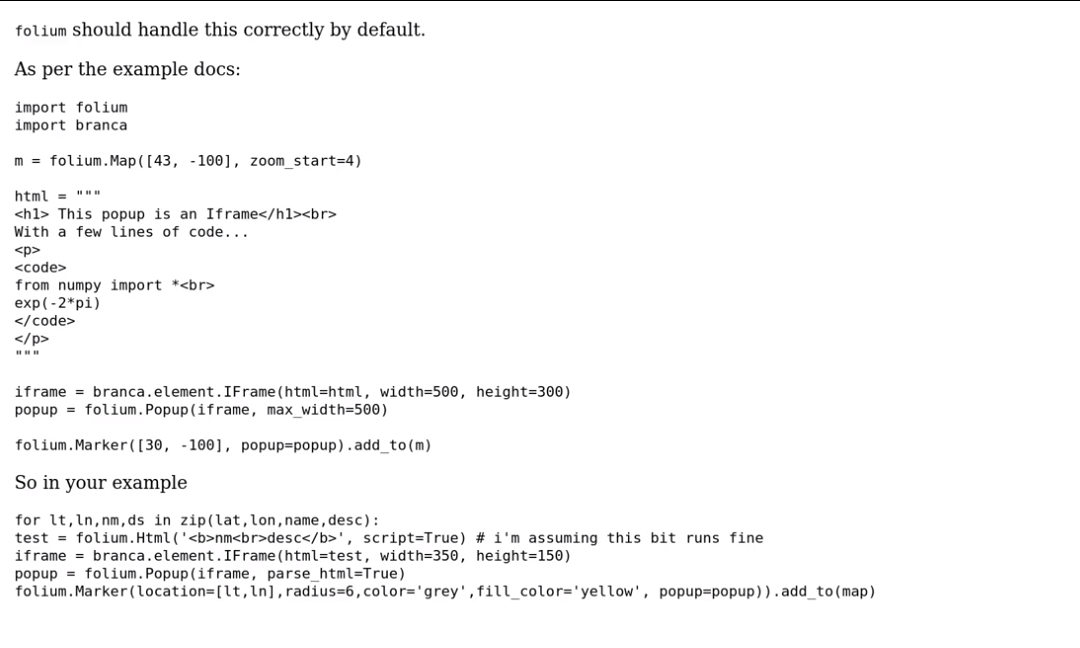

In [7]:
import folium
import branca

m = folium.Map(location=[43, -100], zoom_start=4)

m

In [8]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click  ME!"




# Here is the example from stackoverflow[]



In [11]:
url = 'http://wikipedia.org'
def get_frame(url,width=100,height=100):
    html = """ 
        <!doctype html>
        <html>
        <iframe id="myIFrame" width="{}" height="{}" src={}""".format(width,height,url) + """ frameborder="0"></iframe>
        <script type="text/javascript">
        var resizeIFrame = function(event) {
            var loc = document.location;
            if (event.origin != loc.protocol + '//' + loc.host) return;

            var myIFrame = document.getElementById('myIFrame');
            if (myIFrame) {
                myIFrame.style.height = event.data.h + "px";
                myIFrame.style.width  = event.data.w + "px";
            }
        };
        if (window.addEventListener) {
            window.addEventListener("message", resizeIFrame, false);
        } else if (window.attachEvent) {
            window.attachEvent("onmessage", resizeIFrame);
        }
        </script>
        </html>"""

    marker = folium.CircleMarker([43, -103], radius=10, 
                                 popup=popup)
    marker.add_to(m)

    popup = folium.Popup(get_frame(url))
    return popup

# [DataScience Blog](https://towardsdatascience.com/use-html-in-folium-maps-a-comprehensive-guide-for-data-scientists-3af10baf9190) towards tut for Folium


In [ ]:
df = pd.read_csv('/root/DB/college_folium.csv')
df

In [ ]:
df['INSTNM']

In [ ]:
LOCATION = df['LATITUDE'].mean(), df['LONGITUDE'].mean()
LOCATION

In [ ]:
m = folium.Map(location=LOCATION, zoom_start=5)
m

In [13]:
for i in range(0, len(df)):
    labels=df['INSTNM'].iloc[i]
    folium.Marker([df['LATITUDE'].iloc[i]\
                 ,df['LONGITUDE'].iloc[i]]\
                 ,popup=labels\
                 ,icon=folium.Icon(icon='university', prefix='fa')\
                 ).add_to(m)
    
m

In [17]:
def popup_html(row):
    i = row
    institution_name = df['INSTNM'].iloc[i]
    institution_url = df['URL'].iloc[i]
    html = """
        <!DOCTYPE html>
        <html>
        <center><h4 style="margin-bottom:5"; width="200px">{}</h4>""".format(institution_name) + """</center>
        <center><a href=\"""" + institution_url + """\">Go to the Institution's Website</a></center>


        </html>
        """
    return html

In [16]:
from bs4 import BeautifulStoneSoup as bs
HTML = bs(html)
HTML

NameError: name 'html' is not defined

In [18]:
HTML = popup_html(1)

In [19]:
for i in range(0, len(df)):
    labels=df['INSTNM'].iloc[i]
    html = popup_html(i)
    popup = folium.Popup(folium.Html(html, script=True)\
                         , max_width=500)
    folium.Marker([df['LATITUDE'].iloc[i]\
                 ,df['LONGITUDE'].iloc[i]]\
                 ,popup=popup\
                 ,icon=folium.Icon(icon='university', prefix='fa')\
                 ).add_to(m)
    
m